In [8]:
# for automatic formatting
%load_ext nb_black

<IPython.core.display.Javascript object>

This is a practice notebook for the Seaborn intermediate course on [DataCamp](https://campus.datacamp.com/courses/intermediate-data-visualization-with-seaborn/seaborn-introduction?ex=1)

Additional information on the dataset can be found on [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds).

# Imports and data


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns  # also for data (diamonds)
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [10]:
data = sns.load_dataset("diamonds", cache=True, data_home=None)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<IPython.core.display.Javascript object>

# Displot for distribution

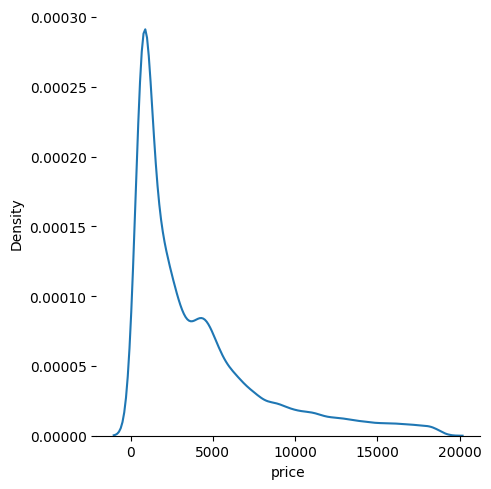

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [11]:
sns.displot(data["price"], kind="kde")
sns.despine(left=True)

plt.show()
plt.clf()

# Regression plot

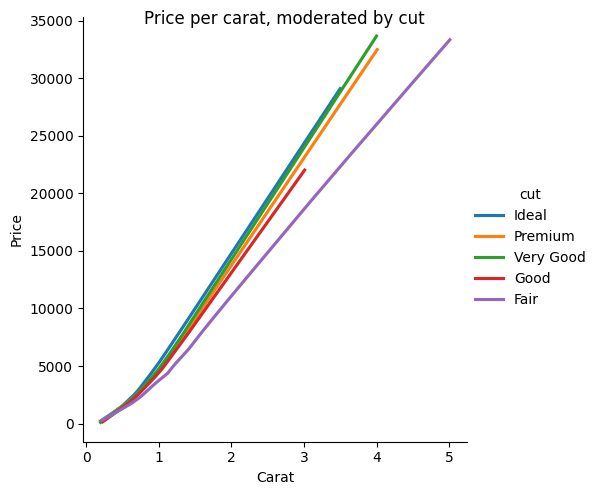

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

In [12]:
import statsmodels

# regression plot
sns.set_style()
g = sns.lmplot(
    data=data,
    x="carat",
    y="price",
    hue="cut",
    markers=".",
    scatter=False,
    lowess=True,
    ci=95,
)
g.set(xlabel="Carat", ylabel="Price")
g.fig.suptitle("Price per carat, moderated by cut")

plt.show()
plt.clf()

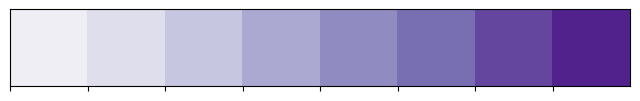

<IPython.core.display.Javascript object>

In [13]:
pal = sns.color_palette("Purples", 8)
sns.palplot(pal)

# Multiplotting by combining sns with plt

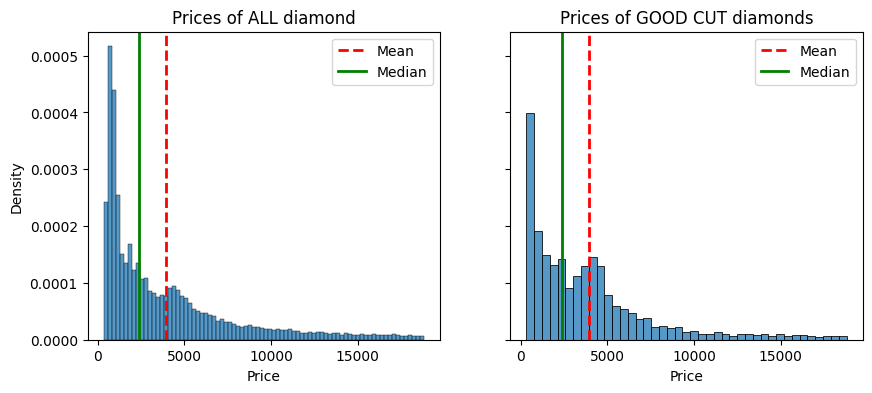

<IPython.core.display.Javascript object>

In [14]:
# combining plt and sns


# instantiate plot
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))

# plot histograms
sns.histplot(data["price"], stat="density", ax=ax0)
sns.histplot(data.query('cut == "Good"')["price"], stat="density", ax=ax1)

# customise labels
ax0.set(xlabel="Price", title="Prices of ALL diamond")

ax1.set(xlabel="Price", title="Prices of GOOD CUT diamonds")

# Add vertical lines for the mean and median
ax0.axvline(
    x=data["price"].mean(), color="r", label="Mean", linestyle="--", linewidth=2
)
ax0.axvline(
    x=data["price"].median(), color="g", label="Median", linestyle="-", linewidth=2
)

ax1.axvline(
    x=data["price"].mean(), color="r", label="Mean", linestyle="--", linewidth=2
)
ax1.axvline(
    x=data["price"].median(), color="g", label="Median", linestyle="-", linewidth=2
)

# display
ax0.legend()
ax1.legend()
plt.show()

# multiple categorical plots


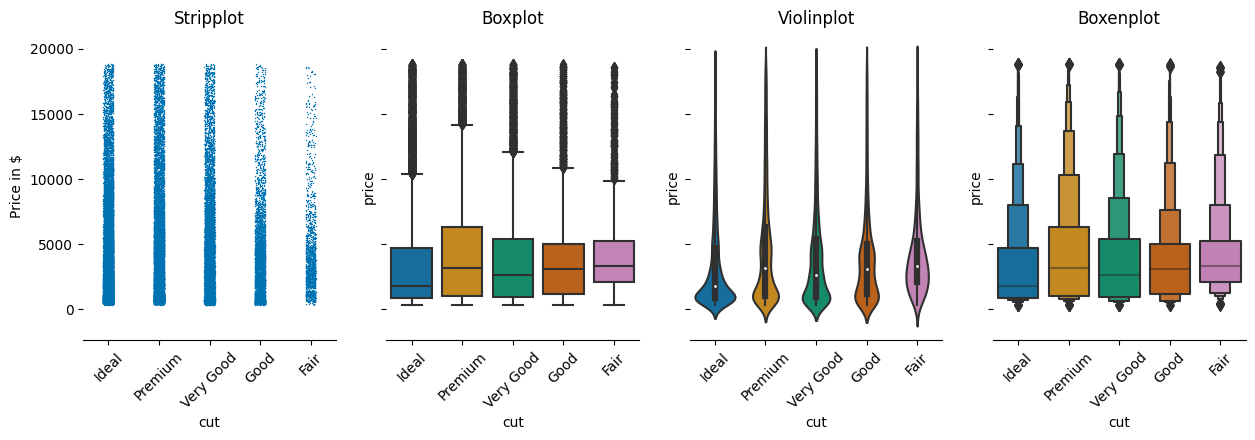

<IPython.core.display.Javascript object>

In [22]:

# lazy argumenting
x = data['cut']
y = data['price']

sns.set_palette('colorblind')

# instatiate of plots
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 4, 
                                        figsize = (15, 4), 
                                         sharey = True)

# plotting
sns.stripplot(x = x, y = y,ax = ax0, size = 1)
sns.boxplot(x = x, y = y, ax = ax1)
sns.violinplot(x = x, y = y, ax = ax2)
sns.boxenplot(x = x, y = y, ax = ax3)


# customisation
ax0.set(title = 'Stripplot', ylabel = 'Price in $', alpha = 0.1)
ax0.tick_params(axis = 'x', labelrotation=45)

ax1.set(title = 'Boxplot')
ax1.tick_params(axis = 'x', labelrotation=45)

ax2.set(title = 'Violinplot')
ax2.tick_params(axis = 'x', labelrotation=45)

ax3.set(title = 'Boxenplot')
ax3.tick_params(axis = 'x', labelrotation=45)


# display
sns.despine(left = True)
plt.show()


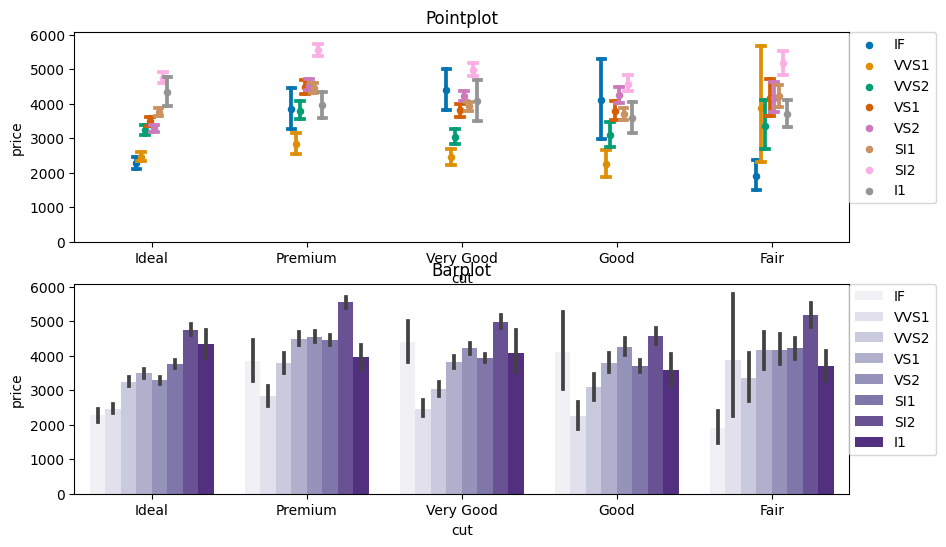

<IPython.core.display.Javascript object>

In [23]:
fig, (ax0, ax1) = plt.subplots(nrows = 2, ncols=1, 
                              figsize = (10, 6), 
                              sharey = True)

sns.pointplot(data, x = 'cut', y = 'price', hue = 'clarity', 
             join = False, dodge = True, capsize = 0.05, markers = '.', 
             ax = ax0).set_title('Pointplot')


sns.barplot(data, x = 'cut', y = 'price', hue = 'clarity',
             ax = ax1, palette = 'Purples').set_title('Barplot')


ax0.legend(bbox_to_anchor=(1, 1), loc = 2, borderaxespad=0.)
ax1.legend(bbox_to_anchor=(1, 1), loc = 2, borderaxespad=0.)

plt.show()


# Regression plots

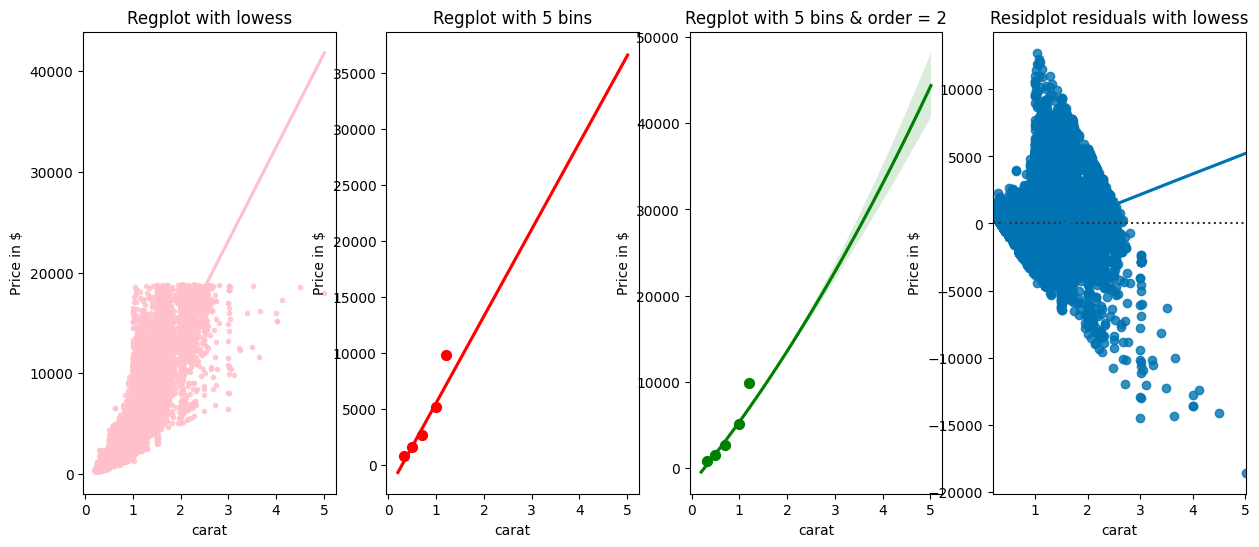

<IPython.core.display.Javascript object>

In [24]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(
    ncols=4, nrows=1, figsize=(15, 6), sharey=False
)

g0 = sns.regplot(
    data=data, x="carat", y="price", marker=".", color="pink", lowess=True, ax=ax0
)
ax0.set(title="Regplot with lowess", ylabel="Price in $", alpha=0.1)


g1 = sns.regplot(data=data, x="carat", y="price", color="red", x_bins=5, ax=ax1)
ax1.set(title="Regplot with 5 bins", ylabel="Price in $", alpha=0.1)


g2 = sns.regplot(
    data=data, x="carat", y="price", color="green", x_bins=5, order=2, ax=ax2
)
ax2.set(title="Regplot with 5 bins & order = 2", ylabel="Price in $", alpha=0.1)


g3 = sns.residplot(data=data, x="carat", y="price", lowess=True, ax=ax3)
ax3.set(title="Residplot residuals with lowess", ylabel="Price in $", alpha=0.1)


plt.show()

# Matrix plots

In [28]:
data_crosstab = (
    pd.crosstab(data["cut"], data["clarity"], values=data["price"], aggfunc="count")
    # / 10000
).round(0)
data_crosstab

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,1212,2047,2606,3589,5071,4282,2598,146
Premium,230,616,870,1989,3357,3575,2949,205
Very Good,268,789,1235,1775,2591,3240,2100,84
Good,71,186,286,648,978,1560,1081,96
Fair,9,17,69,170,261,408,466,210


<IPython.core.display.Javascript object>

In [26]:
data_crosstab_mean = pd.crosstab(
    data["cut"], data["clarity"], values=data["price"], aggfunc="mean"
).round(0)
data_crosstab_mean

clarity,IF,VVS1,VVS2,VS1,VS2,SI1,SI2,I1
cut,,,,,,,,
Ideal,2273.0,2468.0,3250.0,3490.0,3285.0,3752.0,4756.0,4336.0
Premium,3856.0,2831.0,3795.0,4485.0,4550.0,4455.0,5546.0,3947.0
Very Good,4396.0,2459.0,3038.0,3805.0,4216.0,3932.0,4989.0,4078.0
Good,4098.0,2255.0,3079.0,3801.0,4262.0,3690.0,4580.0,3597.0
Fair,1912.0,3871.0,3350.0,4165.0,4175.0,4208.0,5174.0,3704.0


<IPython.core.display.Javascript object>

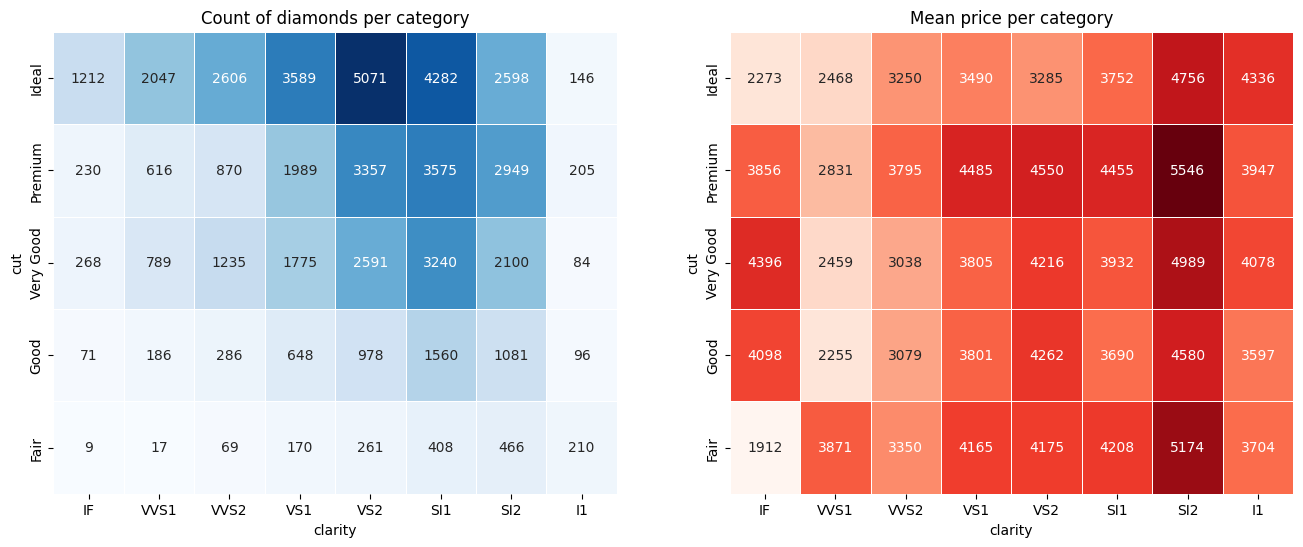

<IPython.core.display.Javascript object>

In [31]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, figsize = (16, 6))

sns.heatmap(data = data_crosstab, 
           annot = True, fmt = 'g', cmap = 'Blues', cbar = False, linewidths = .5, 
           ax = ax0).set_title('Count of diamonds per category')

sns.heatmap(data = data_crosstab_mean, 
           annot = True, fmt = 'g', cmap = 'Reds',  cbar = False, linewidths = .5, 
           ax = ax1).set_title('Mean price per category');



<Axes: >

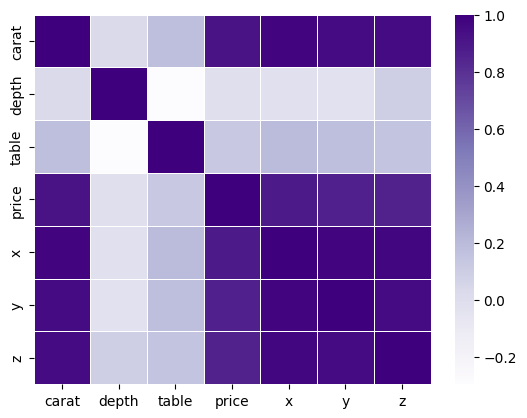

<IPython.core.display.Javascript object>

In [32]:
cols = ["carat", "depth", "table", "price", "x", "y", "z"]
sns.heatmap(data[cols].corr(), cmap="Purples", linewidths=0.5)

# Faceting

In [60]:
data_small = data.sample(50)

,carat,cut,color,clarity,depth,table,price,x,y,z
10590,0.91,Very Good,E,VS2,62.9,55.0,4823,6.13,6.17,3.87
47764,0.58,Ideal,E,VS1,62.6,56.0,1893,5.33,5.27,3.32
2376,0.32,Premium,I,VVS2,62.1,59.0,561,4.35,4.38,2.71
41029,0.41,Premium,E,VVS2,60.9,60.0,1187,4.81,4.82,2.93
39726,0.40,Ideal,E,VS2,62.2,55.0,1090,4.71,4.77,2.95
16857,1.43,Fair,I,VS1,50.8,60.0,6727,7.73,7.25,3.93
17950,1.14,Ideal,G,VS1,62.5,56.0,7255,6.69,6.66,4.17
18161,1.20,Premium,E,SI1,60.3,57.0,7362,6.98,6.84,4.17
15572,1.56,Good,G,SI2,63.7,54.0,6246,7.35,7.31,4.67
39880,0.42,Ideal,G,VVS2,62.4,55.0,1103,4.82,4.79,3.00


<IPython.core.display.Javascript object>

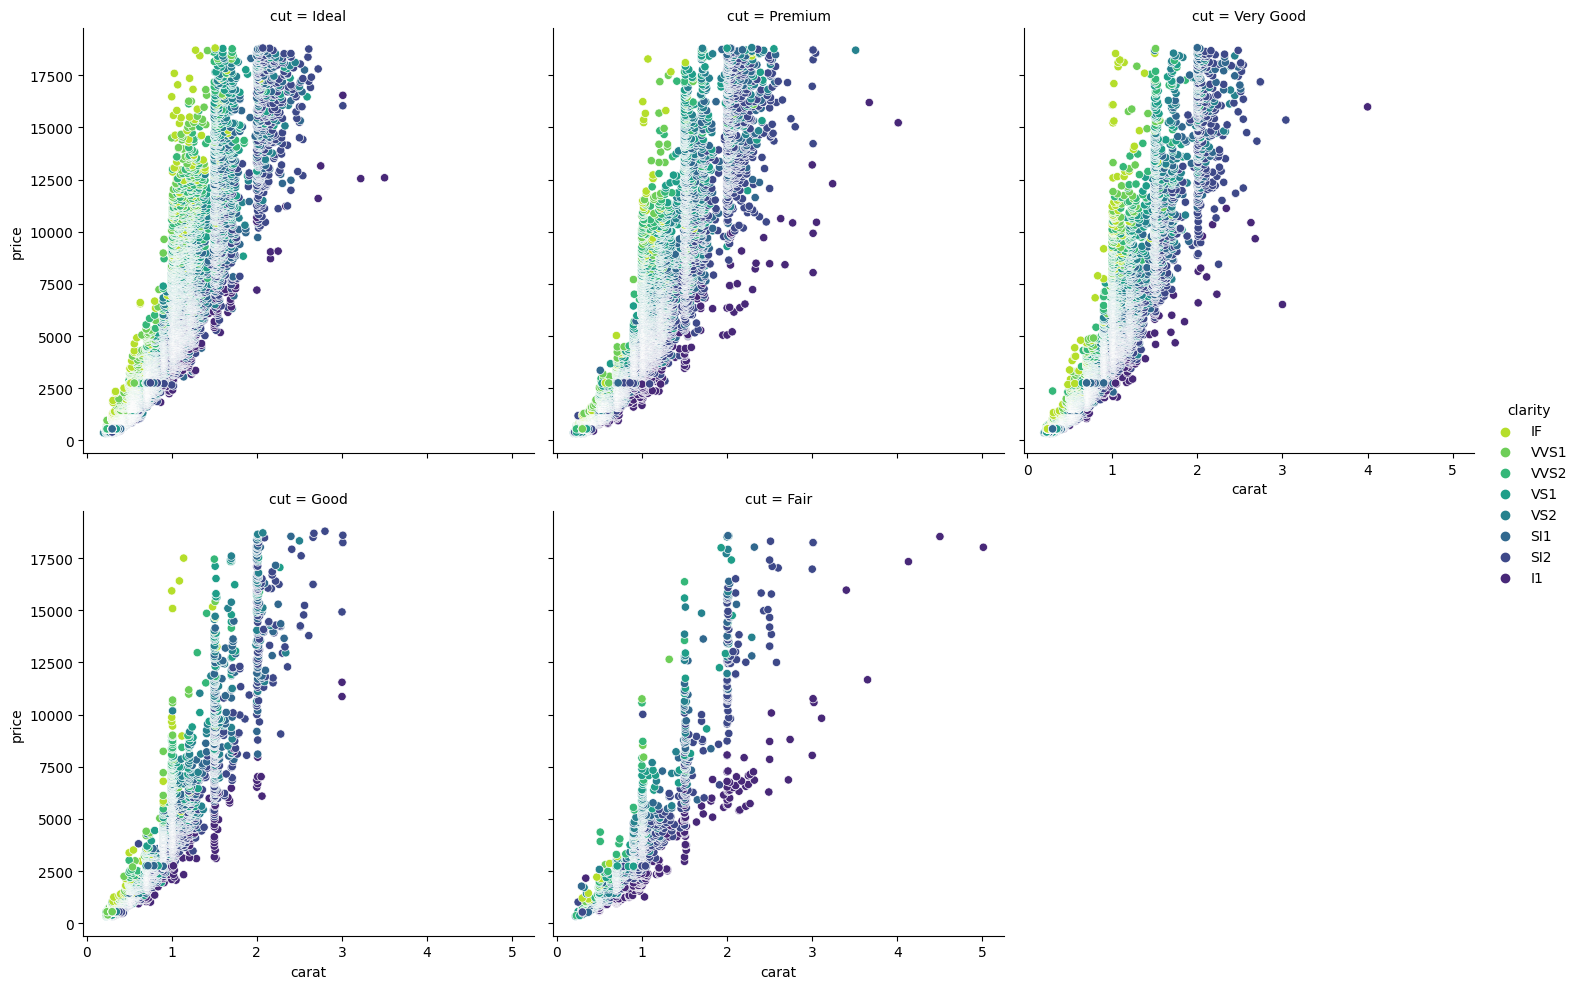

<IPython.core.display.Javascript object>

In [77]:
sns.relplot(data = data, x = 'carat', y = 'price', 
            hue = 'clarity',
            col = 'cut', col_wrap = 3, 
            palette = 'viridis_r')

In [87]:
g = sns.FacetGrid(
    data=data,
    col="carat",
    row="clarity"
    # hue="clarity",
    # col="cut",
    # col_wrap=3,
    # palette="viridis_r",
)

# g.map(plt.hist, "price")

ValueError: Image size of 81900x2400 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7f652089db20> (for post_execute):


ValueError: Image size of 81900x2400 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 81900x2400 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 81900x2400 with 2184 Axes>

<IPython.core.display.Javascript object>

# Let's get serious...

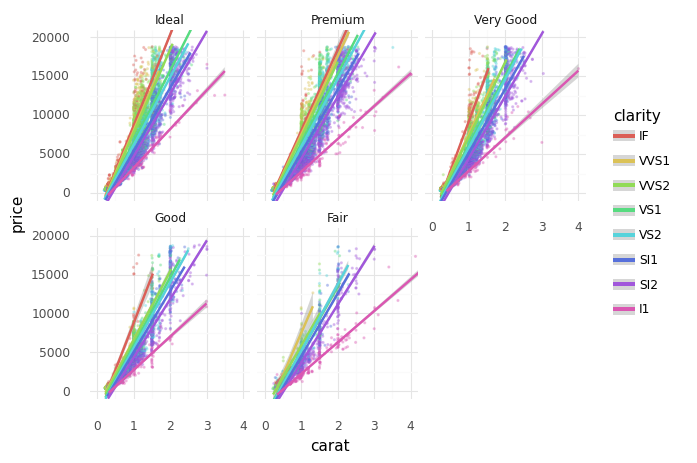

<ggplot: (8754486351285)>

<IPython.core.display.Javascript object>

In [46]:
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_smooth,
    theme_minimal,
    coord_cartesian,
    facet_wrap,
)

(
    ggplot(data)
    + aes("carat", "price", color="clarity")
    + geom_point(
        alpha=0.3, size=0.3
    )  # make points opaque to better account for overlap
    + geom_smooth(
        stat="smooth"
    )  # GLM-based prediction line with 95% CI. Interestingly, plotnine appears to provide an "overall" prediction line (ggplot provides a point-by-point, curvy solution)
    # + labs(
    #     title="Diamond prices based on clarity and carat",
    #     x="Carat",
    #     y="Price of diamond",
    # color="Clarity",
    # )
    + coord_cartesian(xlim=[0, 4], ylim=[0, 20000])
    + facet_wrap("cut")
    + theme_minimal()
)

In [33]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


<IPython.core.display.Javascript object>